In [4]:
import numpy as np
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
import matplotlib.pyplot as plt

## Fit Cholera Model To Data

In [12]:
regionalData = {}
popFactors = {}

# Select Region.  Options "Banadir", "Hiran", "Bay","Middle Shabelle" or "National"
# The data below are for January 2020 - December 2020
Region = "National"

# National
regionalData['National'] = [684, 1011, 864, 451, 805, 909, 447, 322, 264, 212, 238, 274]
# popFactors['National'] = 12327530
popFactors['National'] = 100000

# Banadir
regionalData['Banadir'] = [454, 444, 387, 307, 690, 530, 280, 207, 179, 131, 151, 187]
popFactors['Banadir'] = 100000

#Hiran
regionalData['Hiran'] = [189,393,199,40,29,54,22,0,0,0,0,0]
popFactors['Hiran'] = 100000

#Bay
regionalData['Bay'] = [0,0,0,0,86,285,118,115,85,81,87,87]
popFactors['Bay'] = 100000

#Middle Shabelle
regionalData['MiddleShabelle'] = [0,174,278,104,0,0,0,0,0,0,0,0]
popFactors['MiddleShabelle'] = 100000


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6177
    # data points      = 12
    # variables        = 5
    chi-square         = 5.5209e-05
    reduced chi-square = 7.8871e-06
    Akaike info crit   = -137.471412
    Bayesian info crit = -135.046879
[[Variables]]
    S0:      0.98 (fixed)
    I0:      0.00684213 +/- 0.00280839 (41.05%) (init = 0.01)
    R0:      0.01 (fixed)
    B0:      0.38074241 +/- 11.5499796 (3033.54%) (init = 1)
    alpha:   5.00000001 +/- 366.990947 (7339.82%) (init = 10)
    beta1:   0.05000000 +/- 3.47817305 (6956.35%) (init = 0.107)
    beta2:   0.10000001 +/- 3.01973182 (3019.73%) (init = 0.22)
    gamma0:  0.015 (fixed)
    gamma1:  0.09 (fixed)
    delta:   30 (fixed)
    m:       0.06 (fixed)
    bhat:    20 (fixed)
    khat:    1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, beta1) = -1.000
    C(alpha, beta2) =  0.997
    C(beta1, beta2) = -0.996
    C(B0, beta2)    = -0.991
    C(B0, alpha)

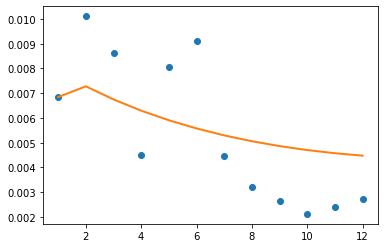

In [13]:
def recovery(params, I):
    return params["gamma0"] + (params["gamma1"] - params["gamma0"]) * (
        params["bhat"] / (I + params["bhat"])
    )

def f(xs, t, params):
    
    S, I, R, B = xs
    
    dS = params["gamma0"] + (params["gamma1"] - params["gamma0"]) * (
            params["bhat"] / (I + params["bhat"]))
    dI = (params["beta1"] * S * I)+ (params["beta2"] * S * B / (B + params["khat"])) - (recovery(params, I) * I) - (params["m"] * I)
    dR = recovery(params, I) * I - (params["m"] * R)
    dB = params["alpha"] * I - params["delta"] * B
    
    return [dS, dI, dR, dB]

def g(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(ps,))
    return x

def residual(ps, ts, data):
    x0 = ps['S0'].value, ps['I0'].value, ps['R0'].value, ps['B0'].value
    model = g(ts, x0, ps)
    return (model[:,1] - data).ravel()

t = np.linspace(1, 12, 12)
data = regionalData[Region]
popFactor = popFactors[Region]

data[:] = [x / popFactor for x in data]

# set parameters incluing bounds
params = Parameters()
params.add('S0', value=0.98,vary=False)
params.add('I0', value= 0.01,vary=True)
params.add('R0', value= 0.01, vary=False)
params.add('B0', value= 1, vary=True)
params.add('alpha', value=10.0, min = 5, max = 15, vary=True)
params.add('beta1', value=0.107, min=0.05, max = 0.2, vary=True)
params.add('beta2', value=0.22, min = 0.1, max = 0.6, vary=True)
params.add('gamma0', value=0.015, vary=False)
params.add('gamma1', value=0.09, vary=False)
params.add('delta', value=30, vary=False)
params.add('m', value=0.06, vary=False)
params.add('bhat', value=20, vary=False)
params.add('khat', value=1, vary=False)

# fit model and find predicted values
result = minimize(residual, params, args=(t, data), method='leastsq')
final = data + result.residual

# plot data and fitted curves
plt.plot(t, data, 'o')
plt.plot(t, final, '-', linewidth=2);

report_fit(result)

In [15]:
regionalData = {}
popFactors = {}

# Select Region.  Options : "SCS","Puntland","Somaliland" or "National"
# The data below are for January 2020 - December 2020
Region = "National"

# National
regionalData['National'] = [2669, 2289, 2205, 2520, 3123, 2399, 1839, 1352, 1971, 2703, 2457, 1999]
popFactors['National']=10000 


# SCS
regionalData['SCS'] = [1007, 1350, 1232, 1218, 1636, 1293, 1302, 1081, 1490, 1424, 1793, 1572]
popFactors['SCS']=10000 

#Somaliland
regionalData['Somaliland'] = [737, 565, 537, 821, 1338, 1052, 498, 231, 416, 1199, 584,322]
popFactors['Somaliland']=10000 

#Puntland
regionalData['Puntland'] = [925, 374, 436, 481, 149, 54, 39, 40, 65, 80, 80, 105]
popFactors['Puntland']=10000 

## Fit Malaria Model To Data

/Users/milano/opt/miniconda3/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 135
    # data points      = 12
    # variables        = 5
    chi-square         = 0.01597134
    reduced chi-square = 0.00228162
    Akaike info crit   = -69.4623916
    Bayesian info crit = -67.0378584
[[Variables]]
    u0:     0.98 (fixed)
    w0:     0.26610852 +/- 0.04774812 (17.94%) (init = 0.01)
    R0:     0.01 (fixed)
    x0:     11.7336889 +/- 14.3139750 (121.99%) (init = 1)
    z0:     5.79356443 +/- 6.96364912 (120.20%) (init = 1)
    nu:     1.07056751 +/- 1.35008031 (126.11%) (init = 2)
    alpha:  0.79798173 +/- 0.29889591 (37.46%) (init = 0.3)
    lamb:   0.00184 (fixed)
    beta:   0.35 (fixed)
    r:      0.2 (fixed)
    gamma:  0.00

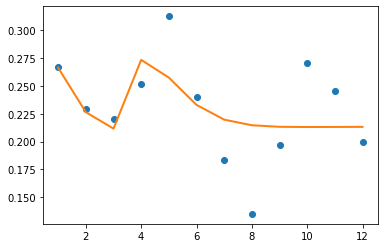

In [16]:
def f(xs, t, params):
    
    u, w, R, x,z = xs
    
    du = params["lamb"] * (1 - u) + params["beta"] * R+ params["r"] * w+ params["gamma"] * w * u- params["zeta"] * u * z
    dw = params["nu"] * (1 - u - R)+ params["gamma"] * w * w- ( params["r"]+ params["alpha"]+ params["gamma"]+ params["lamb"]+ params["nu"])* w
    dR = params["alpha"] * w+ params["gamma"] * w * R- (params["beta"] + params["lamb"]) * R
    dx = params["a"] * (1 - x) - params["b"] * x * w - params["c"] * x * R
    dz = params["e"] * (1 - x) - (params["a"] + params["e"]) * z
    
    return [du, dw, dR, dx, dz]

def g(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(ps,))
    return x

def residual(ps, ts, data):
    x0 = ps['u0'].value, ps['w0'].value, ps['R0'].value, ps['x0'].value,  ps['z0'].value
    model = g(ts, x0, ps)
    return (model[:,1] - data).ravel()

t = np.linspace(1, 12, 12)
data = regionalData[Region]
popFactor = popFactors[Region]

data[:] = [x / popFactor for x in data]

# set parameters incluing bounds
params = Parameters()
params.add('u0', value=0.98,vary=False)
params.add('w0', value= 0.01,vary=True)
params.add('R0', value= 0.01, vary=False)
params.add('x0', value= 1, vary=True)
params.add('z0', value= 1, vary=True)
params.add("nu", value=2, vary=True)
params.add("alpha", value=0.3, vary=True)
params.add("lamb", value=0.00184, vary = False)
params.add("beta", value=0.35, vary=False )
params.add("r", value=0.2, vary=False)
params.add("gamma", value=0.002, vary=False)
params.add("zeta", value=4.066, vary=False)
params.add("r", value = 0.2, vary=False)
params.add("b", value = 10, vary=False)
params.add("c", value=1, vary=False)
params.add("e", value=2.4, vary=False)
params.add("a", value=1.002, vary=False)

# fit model and find predicted values
result = minimize(residual, params, args=(t, data), method='leastsq')
final = data + result.residual

# plot data and fitted curves
plt.plot(t, data, 'o')
plt.plot(t, final, '-', linewidth=2);

report_fit(result)
